Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


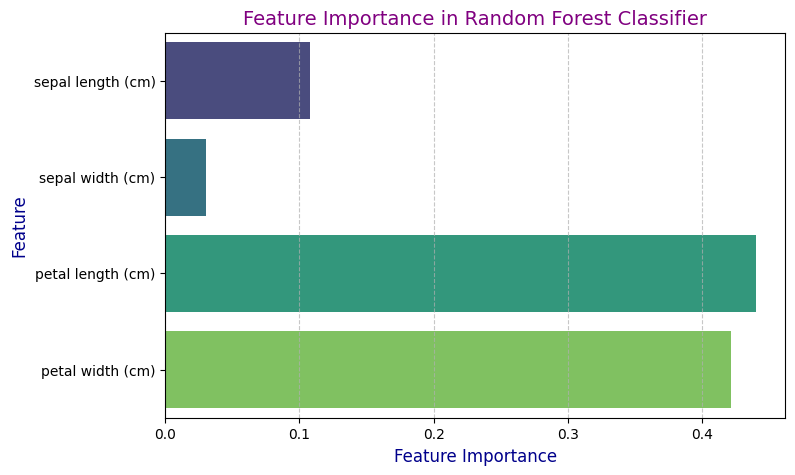

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal & petal length/width)
y = iris.target  # Labels (species)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but improves performance for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\033[1;32mAccuracy:\033[0m", accuracy)
print("\033[1;34mClassification Report:\033[0m\n", classification_report(y_test, y_pred))
print("\033[1;31mConfusion Matrix:\033[0m\n", confusion_matrix(y_test, y_pred))

# Feature importance visualization with color (horizontal bar graph)
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=iris.feature_names, hue=iris.feature_names, palette="viridis", legend=False)
plt.xlabel("Feature Importance", fontsize=12, color='darkblue')
plt.ylabel("Feature", fontsize=12, color='darkblue')
plt.title("Feature Importance in Random Forest Classifier", fontsize=14, color='purple')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()